In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [3]:
data = pd.read_csv("kmeans - kmeans_blobs.csv")




In [5]:
data = data.iloc[:, :2].values

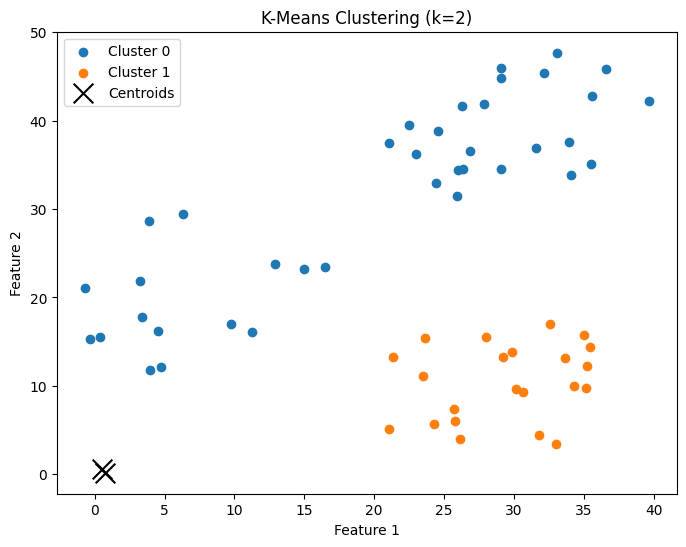

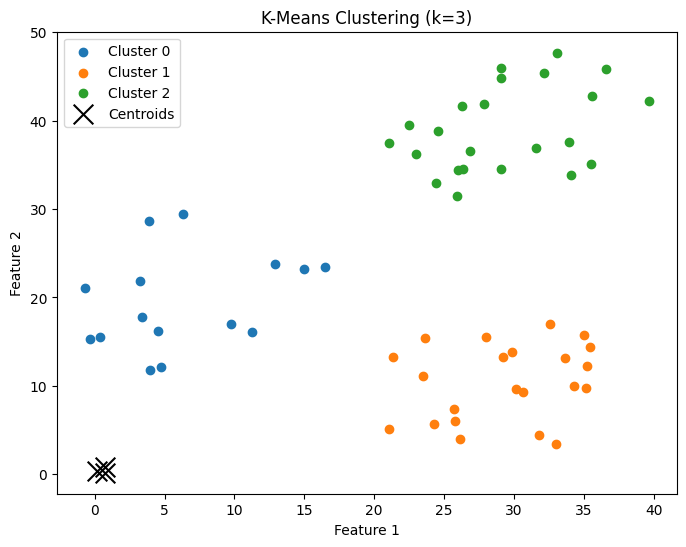

In [7]:
def normalize_data(data):
    return (data - np.min(data, axis=0)) / (np.max(data, axis=0) - np.min(data, axis=0))

def initialize_centroids(data, k):
    np.random.seed(42)
    indices = np.random.choice(data.shape[0], k, replace=False)
    return data[indices]

def compute_distances(data, centroids):
    return np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)

def assign_clusters(data, centroids):
    distances = compute_distances(data, centroids)
    return np.argmin(distances, axis=1)

def update_centroids(data, labels, k):
    return np.array([data[labels == i].mean(axis=0) for i in range(k)])

def kmeans_clustering(data, k, max_iters=100, tol=1e-4):
    data = normalize_data(data)
    centroids = initialize_centroids(data, k)

    for _ in range(max_iters):
        labels = assign_clusters(data, centroids)
        new_centroids = update_centroids(data, labels, k)

        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        centroids = new_centroids

    return labels, centroids

def plot_clusters(data, labels, centroids, k):
    plt.figure(figsize=(8, 6))
    for i in range(k):
        plt.scatter(data[labels == i, 0], data[labels == i, 1], label=f'Cluster {i}')
    plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x', s=200, label='Centroids')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'K-Means Clustering (k={k})')
    plt.legend()
    plt.show()

# Indent the lines within the for loop
for k in [2, 3]:
    labels, centroids = kmeans_clustering(data, k)
    plot_clusters(data, labels, centroids, k)

# New Section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')